In [38]:
import numpy as np
import pandas as pd
import os
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [ ]:
#MinMaxScaler Normalized between -1 and 1

df = pd.read_csv('csv/radiomicas_combinadas_normalizado.csv')
df["Patient"] = df["Patient"].str.replace('"','',regex=False)
df.head(5)


,Patient,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,...,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume
0,LUNG1-001,0.264279,-0.471885,-0.279790,0.025573,-0.868932,-0.822722,-0.349502,0.348139,-0.353586,...,-0.455265,-0.541469,-0.374795,-0.501476,-0.242314,0.370344,0.176528,0.069843,-0.877628,-0.241632
1,LUNG1-002,0.891578,-0.296446,-0.959418,-0.441895,-0.934466,-0.033895,-0.899003,0.711427,-0.869634,...,0.739820,0.633005,-0.881724,0.622963,-0.734643,0.567559,-0.776670,-0.128058,-0.330652,-0.733208
2,LUNG1-003,0.856728,-0.269456,-0.951453,-0.232302,-0.902913,-0.333322,-0.426578,0.693127,-0.817416,...,0.379133,0.320005,-0.867582,0.276626,-0.758680,0.504227,-0.687561,-0.229417,-0.356036,-0.758210
3,LUNG1-004,0.614714,-0.386415,-0.869261,-0.007804,-0.893204,-0.698773,-0.818605,0.464850,-0.517251,...,-0.014991,0.320115,-0.897614,0.241081,-0.829087,-0.352370,-0.666127,-0.398285,-0.257494,-0.827604
4,LUNG1-005,-0.165537,-0.368421,-0.509448,0.272623,-0.771845,-0.875361,-0.887043,0.234176,-0.056650,...,0.264146,0.391344,-0.811464,0.305482,-0.734737,0.097634,-0.580804,-0.231773,-0.442251,-0.733612


In [39]:
#StandardScaler scaled to z values

df = pd.read_csv('csv/radiomicas_combinadas.csv')
df["Patient"] = df["Patient"].str.replace('"','',regex=False)

df_scaled = df.copy()
df_scaled.iloc[:, 1:] = StandardScaler().fit_transform(df_scaled.iloc[:, 1:])
df = df_scaled
df.head(5)

,Patient,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,...,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume
0,LUNG1-001,-0.770901,-0.535339,2.935450,0.491218,-0.139063,-0.912903,1.967610,-0.462555,0.662133,...,-1.410213,-1.653561,3.202783,-1.622792,3.145457,1.454056,1.727631,1.885736,-2.628924,3.143044
1,LUNG1-002,0.747366,0.936893,-0.456281,-0.794639,-0.390801,1.400323,-0.617684,0.976466,-0.806721,...,1.212883,0.959914,-0.251793,1.072434,0.346733,2.059645,-0.577140,1.050606,-0.267202,0.348722
2,LUNG1-003,0.663018,1.163391,-0.416535,-0.218115,-0.269594,0.522257,1.604981,0.903976,-0.658090,...,0.421209,0.263416,-0.155420,0.242282,0.210093,1.865169,-0.361680,0.622879,-0.376805,0.206598
3,LUNG1-004,0.077266,0.181902,-0.006347,0.399409,-0.232299,-0.549426,-0.239424,-0.000251,0.196286,...,-0.443854,0.263661,-0.360082,0.157081,-0.190146,-0.765180,-0.309853,-0.089733,0.048680,-0.187867
4,LUNG1-005,-1.811196,0.332901,1.789323,1.170775,0.233883,-1.067267,-0.561414,-0.913973,1.507316,...,0.168824,0.422162,0.227011,0.311448,0.346201,0.616647,-0.103549,0.612935,-0.749060,0.346424


In [40]:
df2 = pd.read_csv('csv/NSCLC-Radiomics-Lung1.clinical-version3-Oct-2019.csv')
df2.head(5)

,PatientID,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Overall.Stage,Histology,gender,Survival.time,deadstatus.event
0,LUNG1-001,78.7515,2.0,3,0,IIIb,large cell,male,2165,1
1,LUNG1-002,83.8001,2.0,0,0,I,squamous cell carcinoma,male,155,1
2,LUNG1-003,68.1807,2.0,3,0,IIIb,large cell,male,256,1
3,LUNG1-004,70.8802,2.0,1,0,II,squamous cell carcinoma,male,141,1
4,LUNG1-005,80.4819,4.0,2,0,IIIb,squamous cell carcinoma,male,353,1


In [41]:
print(df.shape)
print(df2.shape)

(418, 108)
(422, 10)


In [42]:
embedding =MDS(n_components=2, random_state=42)
ids = df["Patient"]
reducted_data = pd.DataFrame(embedding.fit_transform(df.drop(columns=['Patient'])))
reducted_data["Patient"] = ids
reducted_data.head(5)



/home/roth/aaron/TFG/code/venv/lib/python3.14/site-packages/sklearn/manifold/_mds.py:744: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9. To suppress this warning, provide some value of `n_init`.
  warnings.warn(
/home/roth/aaron/TFG/code/venv/lib/python3.14/site-packages/sklearn/manifold/_mds.py:754: FutureWarning: The default value of `init` will change from 'random' to 'classical_mds' in 1.10. To suppress this warning, provide some value of `init`.
  warnings.warn(


,0,1,Patient
0,1.853659,12.979715,LUNG1-001
1,-6.178755,0.138749,LUNG1-002
2,-1.774035,4.873872,LUNG1-003
3,2.584765,-1.508003,LUNG1-004
4,11.172401,-1.237970,LUNG1-005


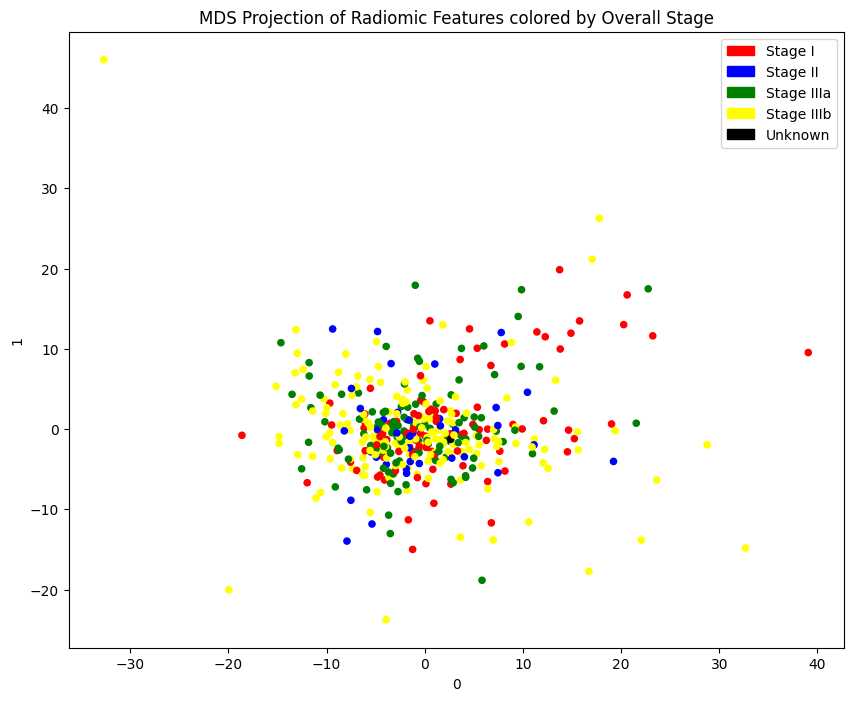

In [43]:
def get_color_by_overall_stage(patient_id):
    switcher = {
        'I': 'red',
        'II': 'blue',
        'IIIa': 'green',
        'IIIb': 'yellow'
    }
    return switcher.get(df2[df2['PatientID'] == patient_id]['Overall.Stage'].values[0], 'black')

colors = df["Patient"].map(get_color_by_overall_stage)

handles = [mpatches.Patch(color='red', label='Stage I'),
           mpatches.Patch(color='blue', label='Stage II'),
           mpatches.Patch(color='green', label='Stage IIIa'),
           mpatches.Patch(color='yellow', label='Stage IIIb'),
           mpatches.Patch(color='black', label='Unknown')]
    
plot = reducted_data.plot(kind='scatter', x=0, y=1, figsize=(10, 8), title='MDS Projection of Radiomic Features colored by Overall Stage', color=colors)

plot.legend(handles=handles)

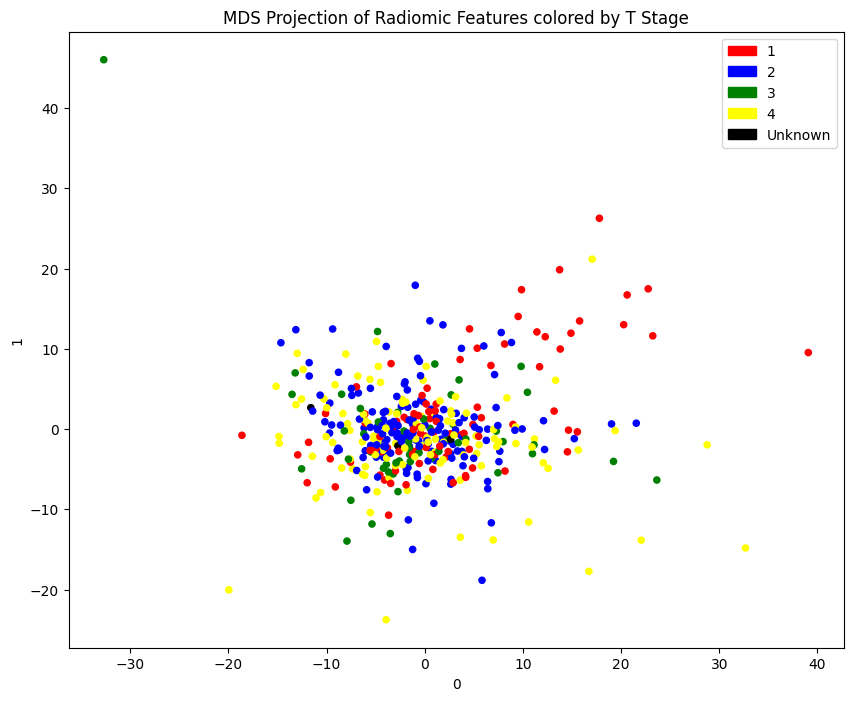

In [44]:
def get_color_by_T_stage(patient_id):
    switcher = {
        1: 'red',
        2: 'blue',
        3: 'green',
        4: 'yellow'
    }
    return switcher.get(df2[df2['PatientID'] == patient_id]['clinical.T.Stage'].values[0], 'black')

colors = df["Patient"].map(get_color_by_T_stage)

handles = [mpatches.Patch(color='red', label='1'),
           mpatches.Patch(color='blue', label='2'),
           mpatches.Patch(color='green', label='3'),
           mpatches.Patch(color='yellow', label='4'),
           mpatches.Patch(color='black', label='Unknown')]
    
plot = reducted_data.plot(kind='scatter', x=0, y=1, figsize=(10, 8), title='MDS Projection of Radiomic Features colored by T Stage', color=colors)

plot.legend(handles=handles)

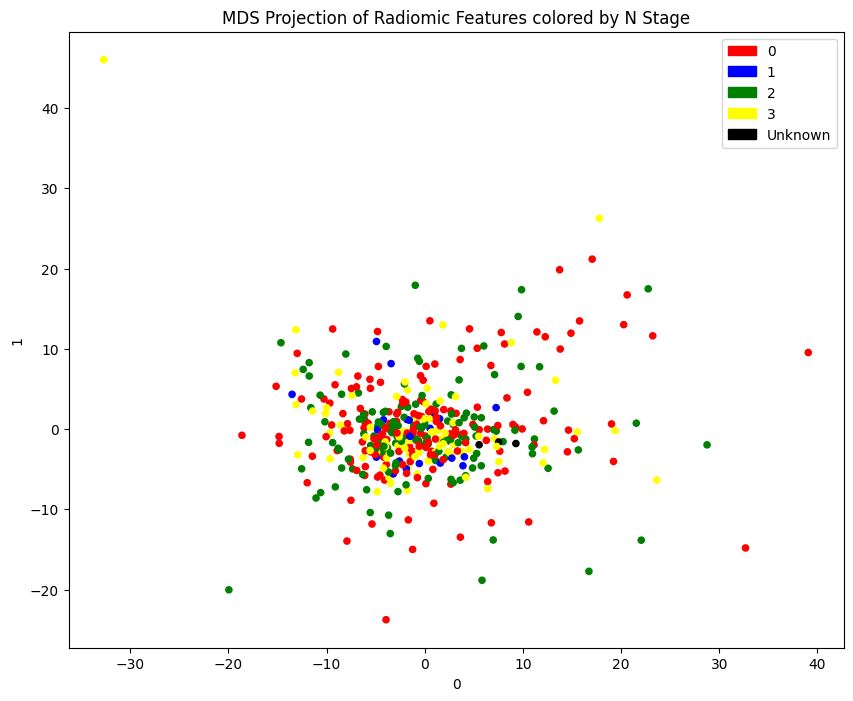

In [45]:
def get_color_by_N_stage(patient_id):
    switcher = {
        0: 'red',
        1: 'blue',
        2: 'green',
        3: 'yellow'
    }
    return switcher.get(df2[df2['PatientID'] == patient_id]['Clinical.N.Stage'].values[0], 'black')

colors = df["Patient"].map(get_color_by_N_stage)

handles = [mpatches.Patch(color='red', label='0'),
           mpatches.Patch(color='blue', label='1'),
           mpatches.Patch(color='green', label='2'),
           mpatches.Patch(color='yellow', label='3'),
           mpatches.Patch(color='black', label='Unknown')]
    
plot = reducted_data.plot(kind='scatter', x=0, y=1, figsize=(10, 8), title='MDS Projection of Radiomic Features colored by N Stage', color=colors)

plot.legend(handles=handles)

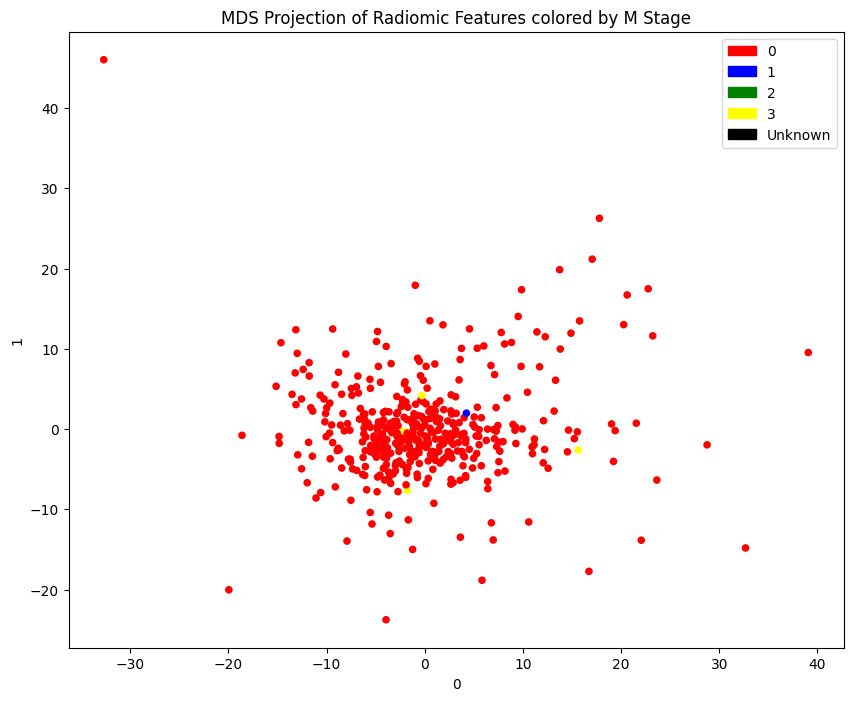

In [46]:
def get_color_by_M_stage(patient_id):
    switcher = {
        0: 'red',
        1: 'blue',
        2: 'green',
        3: 'yellow'
    }
    return switcher.get(df2[df2['PatientID'] == patient_id]['Clinical.M.Stage'].values[0], 'black')

colors = df["Patient"].map(get_color_by_M_stage)

handles = [mpatches.Patch(color='red', label='0'),
           mpatches.Patch(color='blue', label='1'),
           mpatches.Patch(color='green', label='2'),
           mpatches.Patch(color='yellow', label='3'),
           mpatches.Patch(color='black', label='Unknown')]
    
plot = reducted_data.plot(kind='scatter', x=0, y=1, figsize=(10, 8), title='MDS Projection of Radiomic Features colored by M Stage', color=colors)

plot.legend(handles=handles)

/tmp/ipykernel_2541/427555109.py:7: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  plot = reducted_data.plot(kind='scatter', x=0, y=1, figsize=(10, 8), title='MDS Projection of Radiomic Features colored by Age', color=colors, cmap = 'viridis')


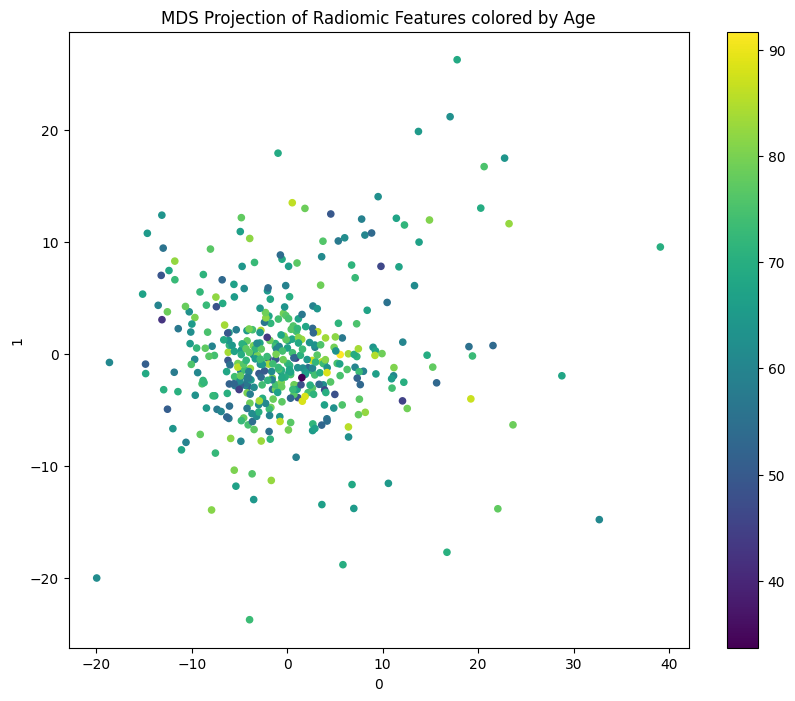

In [47]:
def get_color_by_age(patient_id):
    return df2[df2['PatientID'] == patient_id]['age'].values[0]

colors = df["Patient"].map(get_color_by_age)

    
plot = reducted_data.plot(kind='scatter', x=0, y=1, figsize=(10, 8), title='MDS Projection of Radiomic Features colored by Age', color=colors, cmap = 'viridis')


In [48]:
df2['Histology'].unique()

<StringArray>
['large cell', 'squamous cell carcinoma', 'adenocarcinoma', 'nos', nan]
Length: 5, dtype: str

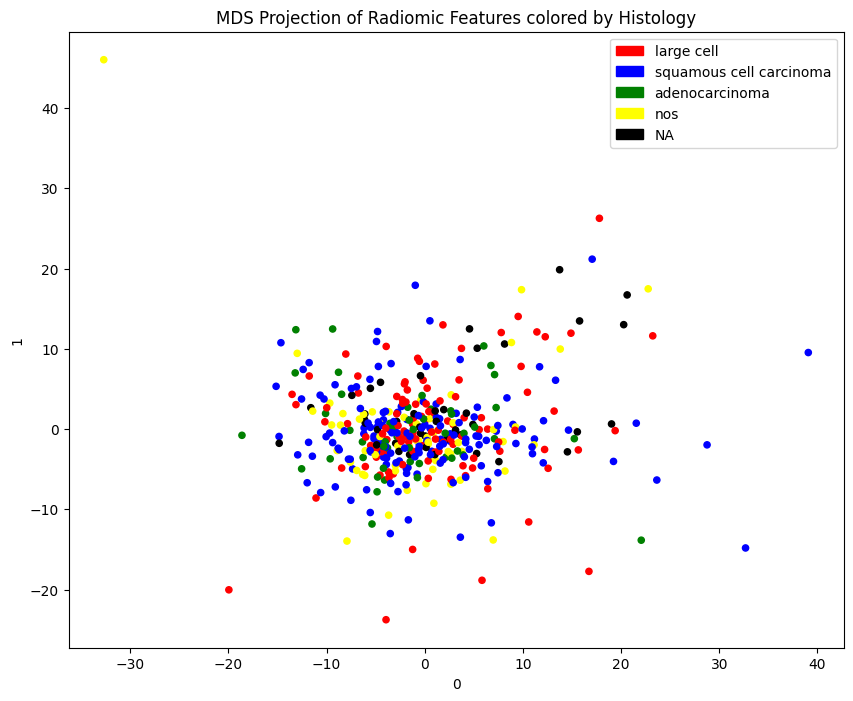

In [49]:
def get_color_by_hystology(patient_id):
    switcher = {
        'large cell': 'red',
        'squamous cell carcinoma': 'blue',
        'adenocarcinoma': 'green',
        'nos': 'yellow',
    }
    return switcher.get(df2[df2['PatientID'] == patient_id]['Histology'].values[0], 'black')

colors = df["Patient"].map(get_color_by_hystology)

handles = [mpatches.Patch(color='red', label='large cell'),
           mpatches.Patch(color='blue', label='squamous cell carcinoma'),
           mpatches.Patch(color='green', label='adenocarcinoma'),
           mpatches.Patch(color='yellow', label='nos'),
           mpatches.Patch(color='black', label='NA')]
    
plot = reducted_data.plot(kind='scatter', x=0, y=1, figsize=(10, 8), title='MDS Projection of Radiomic Features colored by Histology', color=colors)

plot.legend(handles=handles)

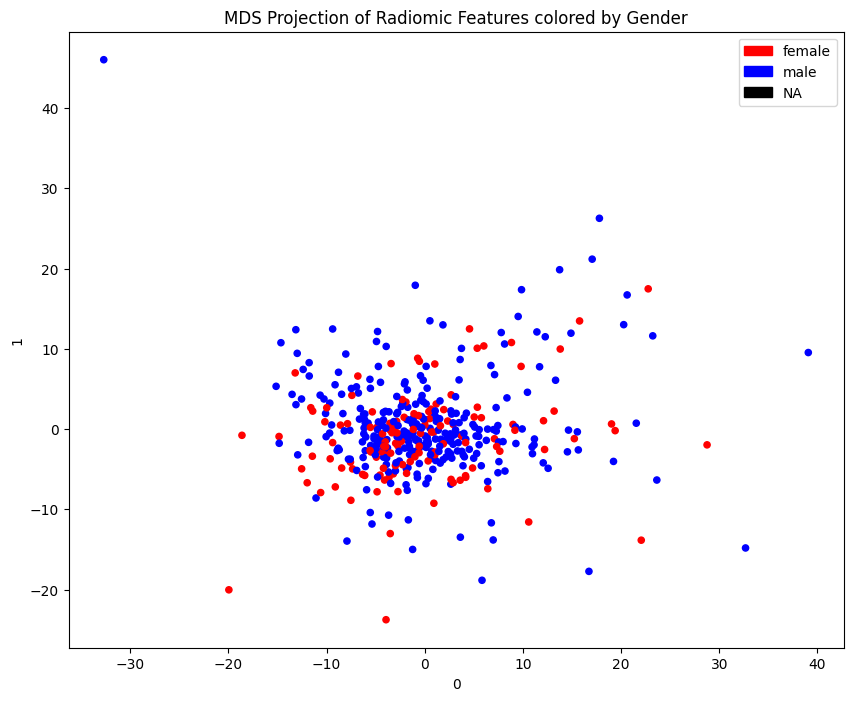

In [50]:
def get_color_by_gender(patient_id):
    switcher = {
        'male': 'blue',
        'female': 'red'
    }
    return switcher.get(df2[df2['PatientID'] == patient_id]['gender'].values[0], 'black')

colors = df["Patient"].map(get_color_by_gender)

handles = [mpatches.Patch(color='red', label='female'),
           mpatches.Patch(color='blue', label='male'),
           mpatches.Patch(color='black', label='NA')]
    
plot = reducted_data.plot(kind='scatter', x=0, y=1, figsize=(10, 8), title='MDS Projection of Radiomic Features colored by Gender', color=colors)

plot.legend(handles=handles)

/tmp/ipykernel_2541/2547011720.py:7: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  plot = reducted_data.plot(kind='scatter', x=0, y=1, figsize=(10, 8), title='MDS Projection of Radiomic Features colored by Survival Time', color=colors, cmap = 'viridis')


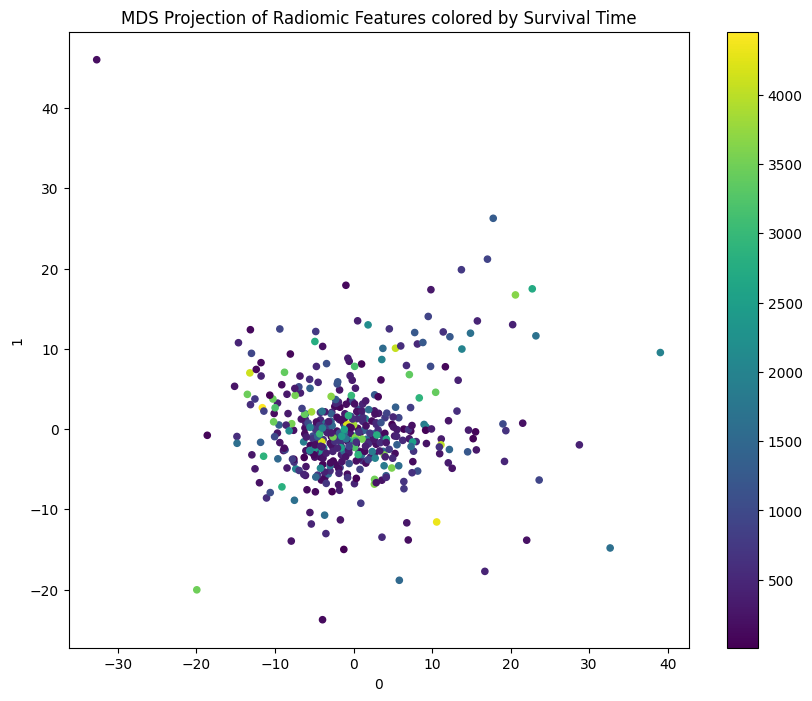

In [51]:
def get_color_by_survival_time(patient_id):
    return df2[df2['PatientID'] == patient_id]['Survival.time'].values[0]

colors = df["Patient"].map(get_color_by_survival_time)

    
plot = reducted_data.plot(kind='scatter', x=0, y=1, figsize=(10, 8), title='MDS Projection of Radiomic Features colored by Survival Time', color=colors, cmap = 'viridis')